In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
import numpy as np 
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### <center>Analyses de séries chronologiques et des prévisions pour les ventes d'Electromenager.</center> 

In [3]:
df = pd.read_excel("Ventes.xlsx")
Electromenager = df.loc[df['Categorie'] == 'Electromenager']
df

,Unnamed: 0,Identifiant,Num_Commande,Date_Commande,Expedition_Date,Expedition_type,Identifiant_client,Nom_client,Type_client,Pays,...,Code_postal,Region,Id_produit,Categorie,Sous_categorie,Nom_produit,Montant,Quantite,Remise,Benefice
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,France,...,42420,South,FUR-BO-10001798,Electromenager,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,France,...,42420,South,FUR-CH-10000454,Electromenager,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,France,...,90036,West,OFF-LA-10000240,MesCourses,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,France,...,33311,South,FUR-TA-10000577,Electromenager,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,France,...,33311,South,OFF-ST-10000760,MesCourses,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,France,...,33180,South,FUR-FU-10001889,Electromenager,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,France,...,92627,West,FUR-FU-10000747,Electromenager,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,France,...,92627,West,TEC-PH-10003645,Informatique,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,France,...,92627,West,OFF-PA-10004041,MesCourses,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
Electromenager.shape

(2121, 22)

Nous disposons de bonnes données sur les ventes d'Electromenager sur quatre ans. 

In [4]:
Electromenager['Date_Commande'].min()

Timestamp('2014-01-06 00:00:00')

In [5]:
Electromenager['Date_Commande'].max()

Timestamp('2017-12-30 00:00:00')

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Identifiant', 'Num_Commande', 'Date_Commande',
       'Expedition_Date', 'Expedition_type', 'Identifiant_client',
       'Nom_client', 'Type_client', 'Pays', 'Ville', 'Province', 'Code_postal',
       'Region', 'Id_produit', 'Categorie', 'Sous_categorie', 'Nom_produit',
       'Montant', 'Quantite', 'Remise', 'Benefice'],
      dtype='object')


## Data preprocessing

Cette étape comprend la suppression des colonnes dont nous n'avons pas besoin, la vérification des valeurs manquantes, l'agrégation des ventes par date, etc.

In [7]:
cols = ['Unnamed: 0','Identifiant', 'Num_Commande', 
        'Expedition_Date', 'Expedition_type', 
        'Identifiant_client', 'Nom_client', 
        'Type_client', 'Pays', 
        'Ville','Province', 
        'Code_postal', 'Region',
        'Id_produit', 'Categorie', 
        'Sous_categorie', 'Nom_produit',
        'Quantite', 'Remise',
        'Benefice']
Electromenager.drop(cols, axis=1, inplace=True)
Electromenager = Electromenager.sort_values('Date_Commande')

In [8]:
Electromenager.isnull().sum()

Date_Commande    0
Montant          0
dtype: int64

In [9]:
#Mois par Montant
Electromenager = Electromenager.groupby('Date_Commande')['Montant'].sum().reset_index()

In [10]:
Electromenager.head()

,Date_Commande,Montant
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


### <center>Indexation avec des données de séries chronologiques </center>

In [11]:
#Construction d'un tableau multi dimenstionnel

Electromenager = Electromenager.set_index('Date_Commande')
Electromenager.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Date_Commande', length=889, freq=None)

<center> Il peut être difficile de travailler avec nos données actuelles sur la date et l'heure, c'est pourquoi nous utiliserons plutôt la valeur moyenne des ventes quotidiennes pour ce mois, et nous utiliserons le début de chaque mois comme timestamp.</center>

B        : business day frequency <br>
C        : custom business day frequency (experimental)<br>
D        : calendar day frequency<br>
W        : weekly frequency<br>
M        : month end frequency<br>
SM       : semi-month end frequency (15th and end of month)<br>
BM       : business month end frequency<br>
CBM      : custom business month end frequency<br>
MS       : month start frequency<br>
SMS     :  semi-month start frequency (1st and 15th)<br>
BMS     :  business month start frequency<br>
CBMS     : custom business month start frequency<br>
Q        : quarter end frequency<br>
BQ       : business quarter endfrequency<br>
QS       : quarter start frequency<br>
BQS      : business quarter start frequency<br>
A        : year end frequency<br>
BA, BY   : business year end frequency<br>
AS, YS   : year start frequency<br>



In [12]:
#MS month start frequency + moyenne
Month_start = Electromenager['Montant'].resample('MS').mean()
Quarter     = Electromenager['Montant'].resample('Q').mean()

<center>Données de 2017

In [21]:
y['2017':]

Date_Commande
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Montant, dtype: float64

## Visualisation des données chronologiques sur les ventes d'electromenager

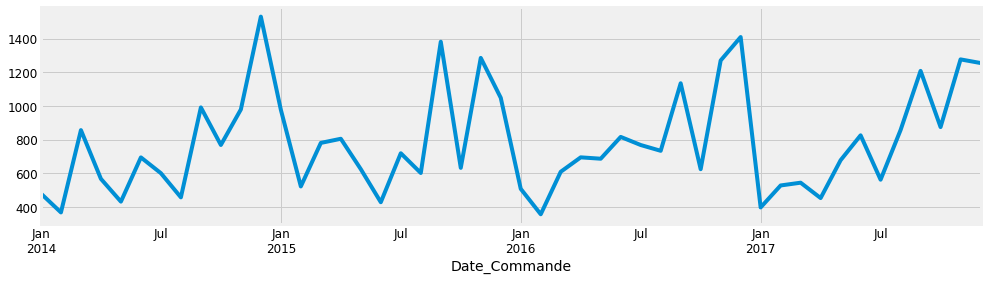

In [36]:
Month_start.plot(figsize=(15, 4))
plt.show()
#Month_start.plot(figsize=(15, 4), color='orange')


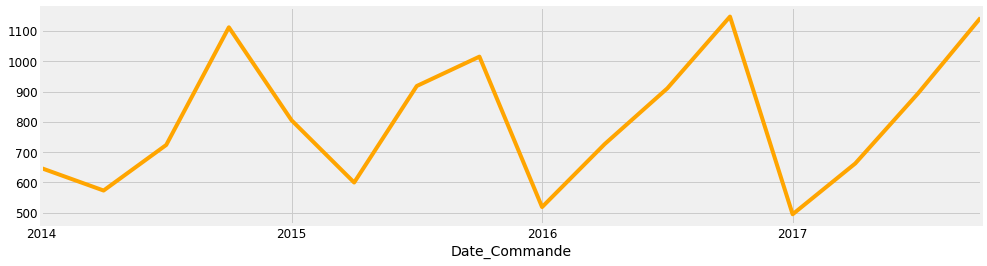

In [19]:
Quarter.plot(figsize=(15,4))
plt.show()

Certains schémas distincts apparaissent lorsque nous traçons les données. La série chronologique présente des caractéristiques saisonnières, comme le fait que les ventes sont toujours faibles au début de l'année et élevées à la fin de l'année. Il y a toujours une forte tendance à la hausse au cours d'une même année, avec quelques mois de baisse au milieu de l'année.




Nous pouvons également visualiser nos données en utilisant une méthode appelée décomposition des séries chronologiques qui nous permet de décomposer nos séries chronologiques en trois composantes distinctes : tendance, saisonnalité et bruit. ( trend, seasonality, and noise. )

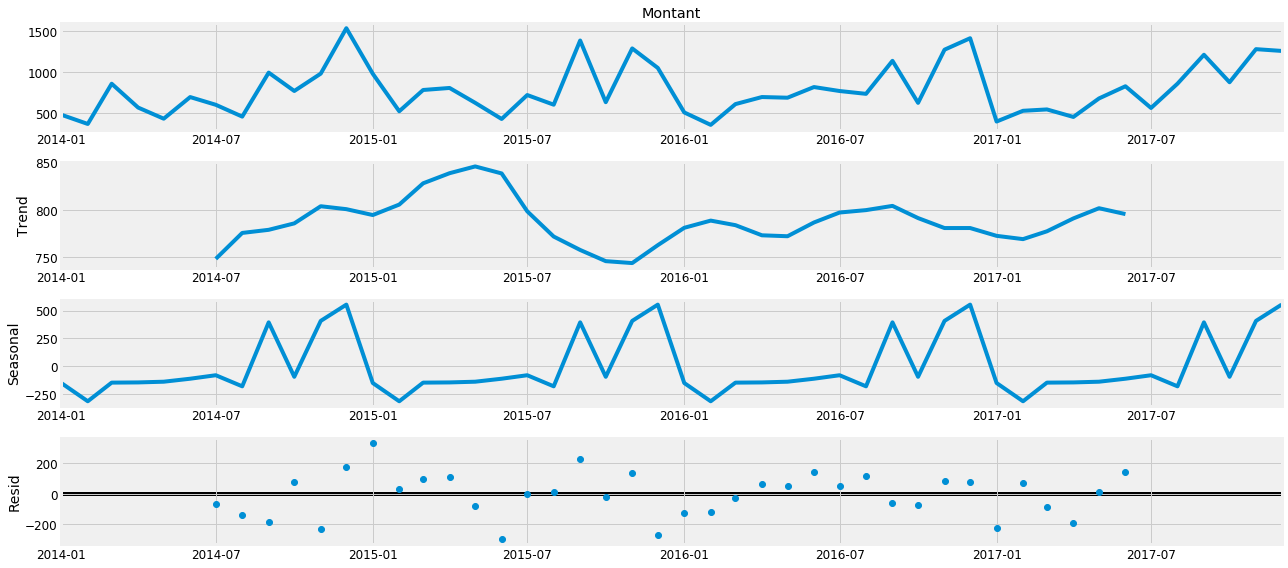

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Le graphique ci-dessus montre clairement que les ventes d'electromenager sont instables, avec leur saisonnalité évidente.

### <center> Prévision des séries chronologiques avec ARIMA

<center>(Autoregressive Integrated Moving Average. )<br>
 
 
Application de l'une des méthodes les plus couramment utilisées pour la prévision des séries chronologiques, connue sous le nom d'ARIMA
Sélection des paramètres pour le modèle de séries chronologiques ARIMA

In [32]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Exemples de combinaisons de paramètres pour ARIMA saisonnier...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemples de combinaisons de paramètres pour ARIMA saisonnier...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [34]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
results.summary()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Montant   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -144.894
Date:                             Sun, 26 Apr 2020   AIC                            297.788
Time:                                     21:24:31   BIC                            302.152
Sample:                                 01-01-2014   HQIC                           298.816
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04
===================================================================================
Ljung-Box (Q):                       21.51   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.43   Prob(JB):                         0.66
Heteroskedasticity (H):               0.55   Skew:                             0.44
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.77e+25. Standard errors may be unstable.
"""

NameError: name 'predict_ci' is not defined

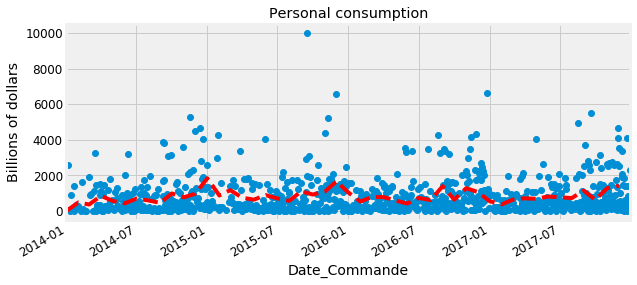

In [35]:
# A REFAIRE

predict = results.get_prediction()
predict

# Graph()
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
Electromenager.loc['2014-01-01':, 'Montant'].plot(ax=ax, style='o', label='Observed')
# Plot predictions

predict.predicted_mean.loc['2014-01-01':].plot(ax=ax, style='r--', label='On step Prediction')
ci = predict_ci.loc['2014-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2014-01-01':].plot(ax=ax, style='g', label='Prediction')
ci = predict_dy_ci.loc['2014-01-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

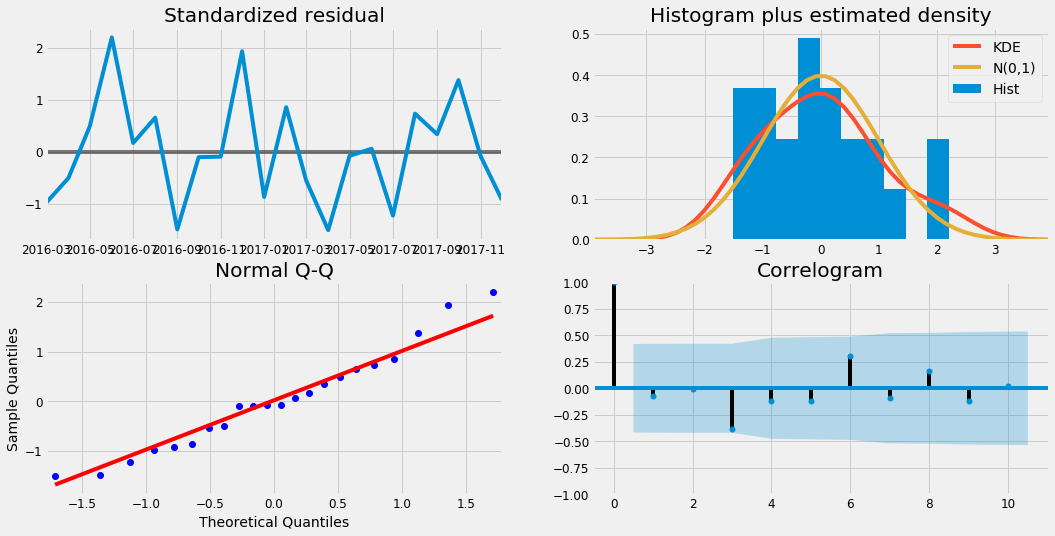

In [250]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

##  Validation des prévisions

Pour nous aider à comprendre la précision de nos prévisions, nous comparons les ventes prévues aux ventes réelles de la série chronologique, et nous fixons les prévisions à partir du 2017-07-01 jusqu'à la fin des données.

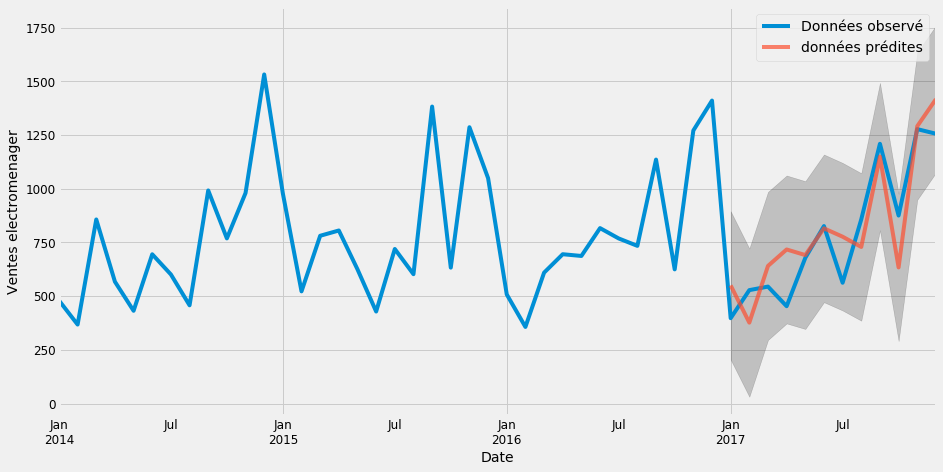

In [278]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='Données observé')
pred.predicted_mean.plot(ax=ax, label='données prédites', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Ventes electromenager')
plt.legend()

plt.show()

Le graphique linéaire montre les valeurs observées par rapport aux prévisions de la prévision glissante. Dans l'ensemble, nos prévisions s'alignent très bien sur les valeurs réelles, montrant une tendance à la hausse dès le début de l'année.

In [280]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean Squared Error = {}'.format(round(mse, 2))) 

Mean Squared Error = 22993.57


In [281]:
print('Root Mean Squared Error = {}'.format(round(np.sqrt(mse), 2))) 

Root Mean Squared Error = 151.64


Mean squared error (MSE) : estimateur mesure la moyenne des carrés des erreurs - c'est-à-dire la différence quadratique moyenne entre les valeurs estimées et ce qui est estimé. L'EQM est une mesure de la qualité d'un estimateur - elle est toujours non négative, et plus l'EQM est faible, plus nous sommes proches de la ligne de meilleure adéquation.

Root Mean Square Error (RMSE) nous dit que notre modèle a pu prévoir la moyenne des ventes quotidiennes d'electromenager dans le test fixé à 151,64 des ventes réelles. Nos ventes quotidiennes d'electromenager vont d'environ 400 à plus de 1 200. c'est un assez bon modèle jusqu'à présent.

## Produire et visualiser des prévisions

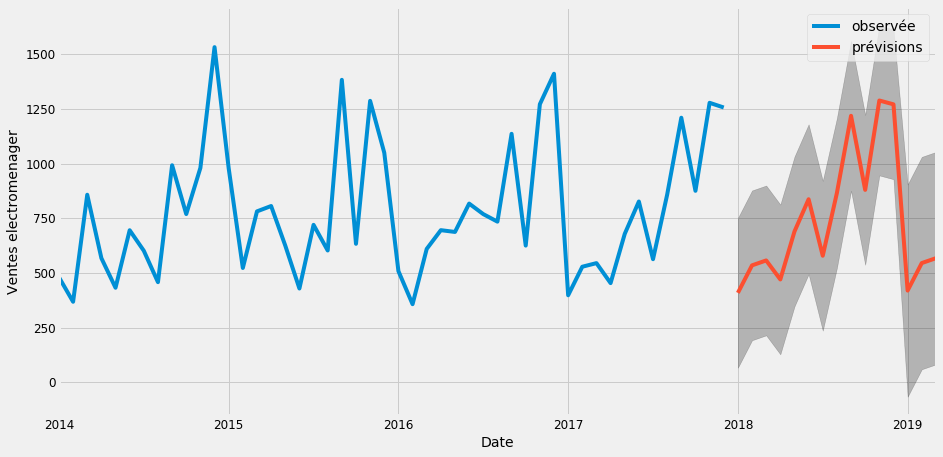

In [290]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observée', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='prévisions')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ventes electromenager')

plt.legend()
plt.show()

Notre modèle a clairement pris en compte la saisonnalité des ventes d'electromenager. Comme nous prévoyons plus loin dans l'avenir, il est naturel que nous devenions moins confiants dans nos valeurs. Cela se reflète dans les intervalles de confiance générés par notre modèle, qui s'élargissent au fur et à mesure que nous nous éloignons dans l'avenir.